### Student Information
Name: 陳柏諭

Student ID: 110034012

GitHub ID: jc533

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# # If you get "ModuleNotFoundError: No module named 'PAMI'"
# # run the following in a new Jupyter cell:
# # !pip3 install PAMI
import PAMI
import umap
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

[nltk_data] Downloading package punkt to /home/supercat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/home/supercat/pocket-space/class/datamining/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 | packaged by conda-forge | (main, Jan 14 2023, 12:27:40) [GCC 11.3.0]


In [2]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df = df[["title","upvote_ratio","text","sentiment","label","subjectivity"]] # keep only column that I think is useful
df

,title,upvote_ratio,text,sentiment,label,subjectivity
0,Retardation is on the menu boys! WSB is so back,NaN,Calls on retards,-1.0,-1.0,1.000000
1,Retail giant TARGET has now declined for 10 co...,NaN,Stunt as in like why did they even make a big ...,1.0,0.0,0.177778
2,How do you feel about a sitting president maki...,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.000000
3,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970
4,The Trump administration is begging Xi Jinping...,NaN,He didn’t say thank you.,0.0,-1.0,0.000000
...,...,...,...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,NaN,Invest now it is going to shoot up tomorrow,0.0,1.0,0.000000
843,$ U.S. dollar value (crashing),NaN,Where can I read this?,0.0,0.0,0.000000
844,Analyst Recommendations,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.000000
845,Weekend Discussion Thread for the Weekend of A...,NaN,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,0.000000


In [3]:
df.head()

,title,upvote_ratio,text,sentiment,label,subjectivity
0,Retardation is on the menu boys! WSB is so back,NaN,Calls on retards,-1.0,-1.0,1.000000
1,Retail giant TARGET has now declined for 10 co...,NaN,Stunt as in like why did they even make a big ...,1.0,0.0,0.177778
2,How do you feel about a sitting president maki...,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.000000
3,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970
4,The Trump administration is begging Xi Jinping...,NaN,He didn’t say thank you.,0.0,-1.0,0.000000


# Exercise 1

In [4]:
for i in range(3):
    print("example ",i+1)
    print(df.text[i])

example  1
Calls on retards
example  2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example  3
Seeing lots of red in the ticker.


# Exercise 2

In [5]:
df.loc[lambda df: df["label"]==1][:10]

,title,upvote_ratio,text,sentiment,label,subjectivity
3,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970
8,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,Am I the only one seeing the cup & handle brea...,1.0,1.0,0.491818
9,Any cheap stocks under $10?,NaN,HLGN is $10. Hurry and catch it now before it ...,0.0,1.0,0.000000
34,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,So they went from saying redditors are bad for...,-1.0,1.0,0.666667
38,Someone post the hotline please.,NaN,"Hey our net worth match now, we can be friends!",1.0,1.0,0.050000
39,Formerly Stable US Treasuries Are Trading Like...,NaN,Other countries probably will go through a rec...,1.0,1.0,0.517857
42,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,So they went from saying redditors are bad for...,-1.0,1.0,0.666667
61,Retail giant TARGET has now declined for 10 co...,NaN,"if best buy can survive, target will survive.",1.0,1.0,0.300000
65,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,I bought into silver companies and made a nice...,1.0,1.0,1.000000
74,Anyone following $MEGA.CN??,NaN,"This is a massive acquisition for them, adding...",0.0,1.0,1.000000


# Exercise 3(skip)

# Exercise 4

In [6]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 1)
1      (The amoung of missing records is: , 1)
2      (The amoung of missing records is: , 1)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 1)
                        ...                   
842    (The amoung of missing records is: , 1)
843    (The amoung of missing records is: , 1)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 1)
846    (The amoung of missing records is: , 1)
Length: 847, dtype: object

In [7]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,title,upvote_ratio,text,sentiment,label,subjectivity
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,783,0,0,0,0


In [8]:
len(df)

847

In [9]:
df.drop(columns=["upvote_ratio"],inplace=True)
len(df)

847

# Exercise 5

In [10]:
df.isnull().sum()

title           0
text            0
sentiment       0
label           0
subjectivity    0
dtype: int64

In [11]:
sum(df.duplicated())

23

In [12]:
df.drop_duplicates(keep=False, inplace=True)
len(df)

813

# Exercise 6

In [13]:
df_sample = df.sample(n=400)
display(df.tail())
display(df_sample.tail())
# Apprently the order of the sequence is different
# And the random state is different every time we run the code sonce the seed is not fiexed
# The original index values are preserved.
# The length is decreased to 400.

,title,text,sentiment,label,subjectivity
841,The Trump administration is begging Xi Jinping...,So countries “begging to stop the tariffs” and...,0.0,1.0,0.0
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,1.0,0.0
843,$ U.S. dollar value (crashing),Where can I read this?,0.0,0.0,0.0
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,0.0
846,Someone post the hotline please.,![img](emote|t5_2th52|31224),0.0,0.0,0.0


,title,text,sentiment,label,subjectivity
227,Weekend Discussion Thread for the Weekend of A...,#Ban Bet Lost\n\n/u/Local-Wall-4359 made a bet...,1.0,0.0,0.400000
317,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,What the actual fuck?,-1.0,-1.0,0.350000
678,🚨China responds to Trump’s 145% tariff with an...,"Poor slave, thinking they're free and democrat...",-1.0,-1.0,0.400265
480,r/Stocks Daily Discussion & Fundamentals Frida...,"Oh, sweet Jesus, Liz Truss this clown",1.0,-1.0,0.650000
213,Data Shows US Allies—Not China—Dumping Treasuries,"ChatGPT model is not build on 2025 data, so, n...",0.0,-1.0,0.000000


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 7

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

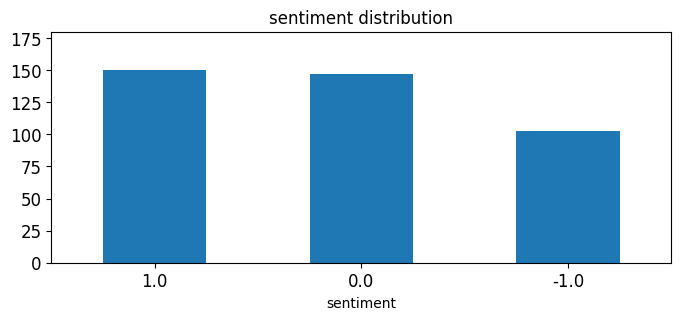

In [15]:
# Answer here
df_sample.sentiment.value_counts().plot(kind="bar",
                                           title="sentiment distribution",
                                           ylim=[0,df_sample.sentiment.value_counts().max()+30],
                                           rot=0, fontsize=12, figsize=(8,3))

# Exercise 8

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

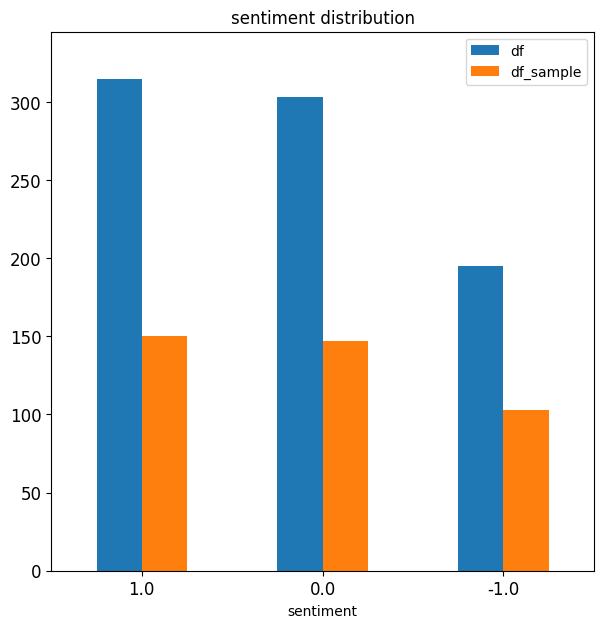

In [16]:
# Answer here
combine_df = pd.concat([df.sentiment.value_counts(),df_sample.sentiment.value_counts()],
                       keys=["df", "df_sample"],axis=1)
combine_df.plot(kind="bar",
                    title="sentiment distribution",
                    ylim=[0,combine_df.max().max()+30],
                    rot=0, fontsize=12, figsize=(7,7))

# Exercise 9

In [17]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df.head()["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])
analyze = count_vect.build_analyzer()

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [19]:
analyze(df.text[0])

['calls', 'on', 'retards']

# Exercise 10(skip)

# Exercise 11

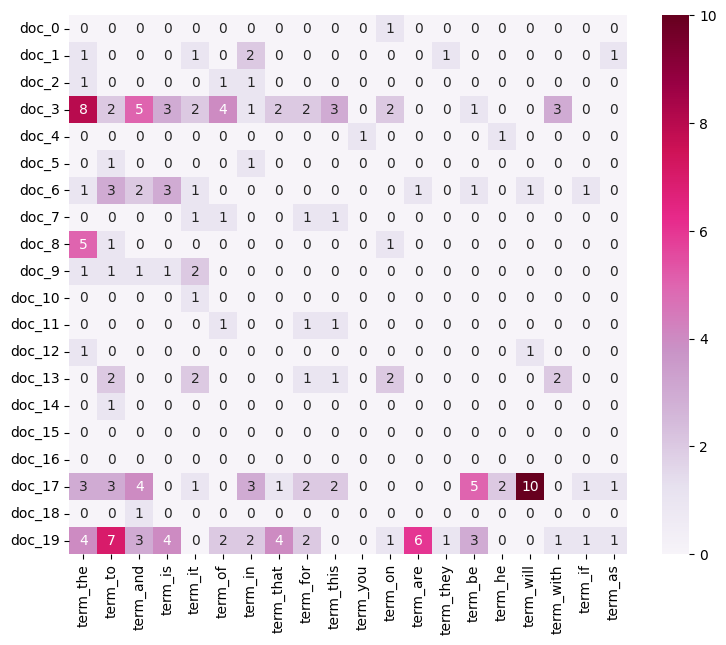

In [20]:
import seaborn as sns
term_freq = np.asarray(df_counts.sum(axis=0)).ravel()
top_idx = term_freq.argsort()[::-1][:20] # select top 20 frequency word
p_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_idx]]
p_y = ["doc_" + str(i) for i in list(df.index)[:20]]
p_z = df_counts[:20, :][:, top_idx].toarray()
df_todraw = pd.DataFrame(p_z, columns=p_x, index=p_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",annot=True)

# Exercise 12

In [21]:
# Answer here
import plotly.express as px

term_freq = np.asarray(df_counts.sum(axis=0)).ravel()
top_idx = term_freq.argsort()[::-1][:20]  # select top 20 frequency word

p_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_idx]]
p_y = ["doc_" + str(i) for i in list(df.index)[:20]]
p_z = df_counts[:20, :][:, top_idx].toarray()

df_todraw = pd.DataFrame(p_z, columns=p_x, index=p_y)
fig = px.imshow(
    df_todraw,
    labels=dict(x="Terms", y="Documents", color="Frequency"),
    x=p_x,
    y=p_y,
    color_continuous_scale="PuRd",
)

fig.update_layout(
    title="Top 20 Frequent Terms (First 20 Docs)",
    xaxis_tickangle=-45,
    width=900,
    height=700,
)

fig.show()

# Exercise 13

/tmp/ipykernel_228648/2451575095.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



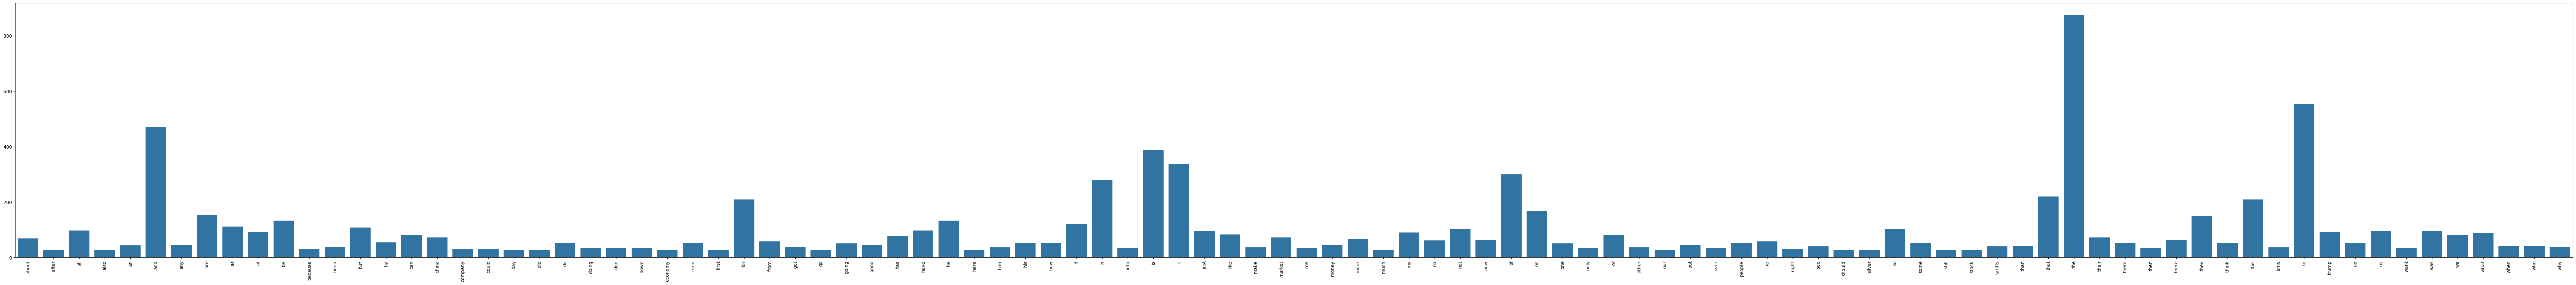

In [22]:
# keep only 100 frequency higher than 25
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

threshold = 25
idx = np.where(term_frequencies >= threshold)[0]
kept_terms = count_vect.get_feature_names_out()[idx]
kept_freqs = term_frequencies[idx]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=kept_terms[:100], 
            y=kept_freqs[:100])
g.set_xticklabels(kept_terms[:100], rotation = 90);


# Exercise 14

/tmp/ipykernel_228648/1944787921.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



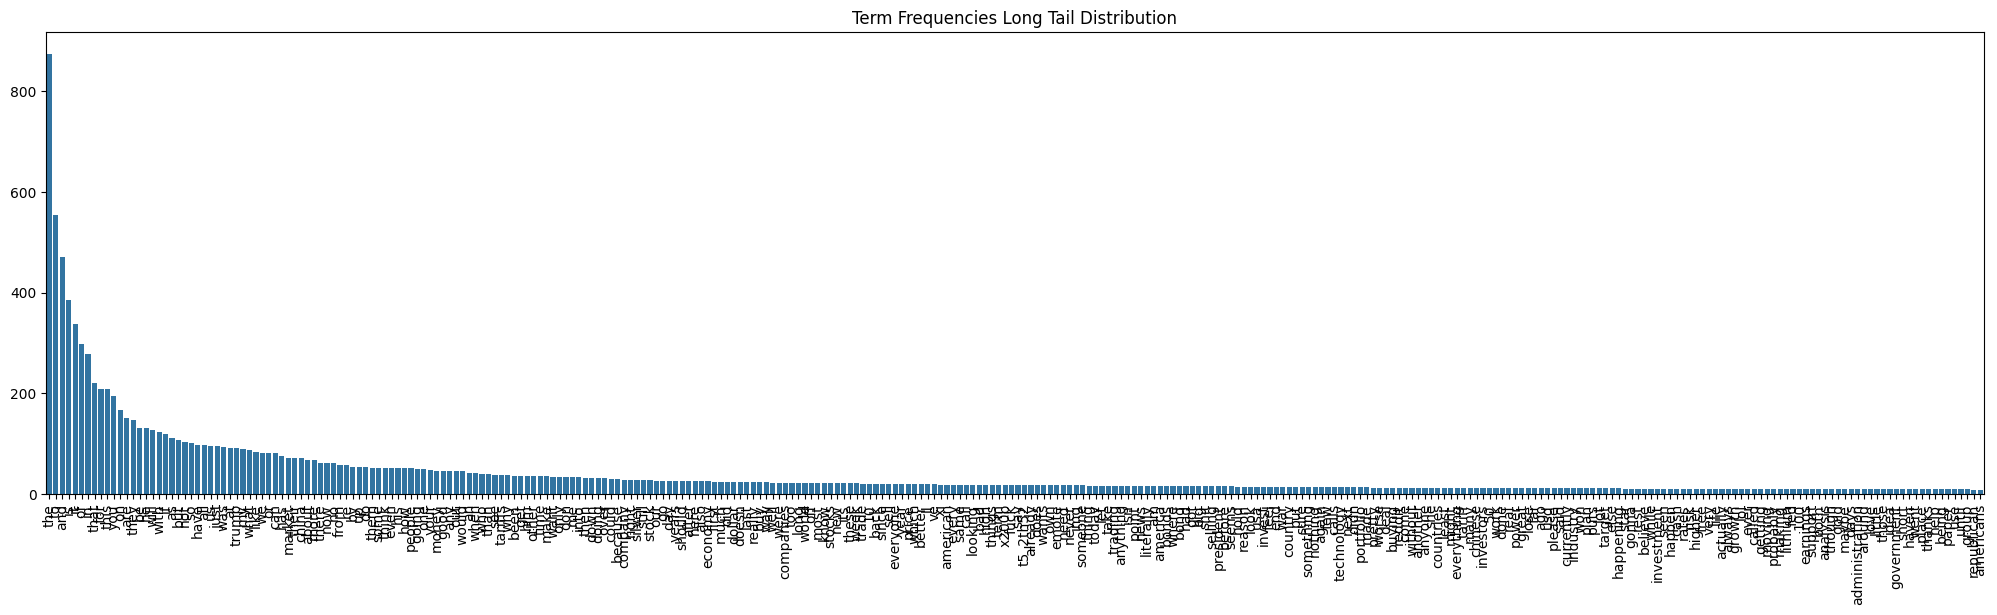

In [23]:
sorted_idx = np.argsort(term_frequencies)[::-1]
kept_terms = count_vect.get_feature_names_out()[sorted_idx]
kept_freqs = term_frequencies[sorted_idx]

plt.subplots(figsize=(25, 6))
g = sns.barplot(x=kept_terms[:300], y=kept_freqs[:300])
g.set_xticklabels(kept_terms[:300], rotation=90)
plt.title("Term Frequencies Long Tail Distribution")
plt.show()

# Exercise 15

/tmp/ipykernel_228648/4130362313.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



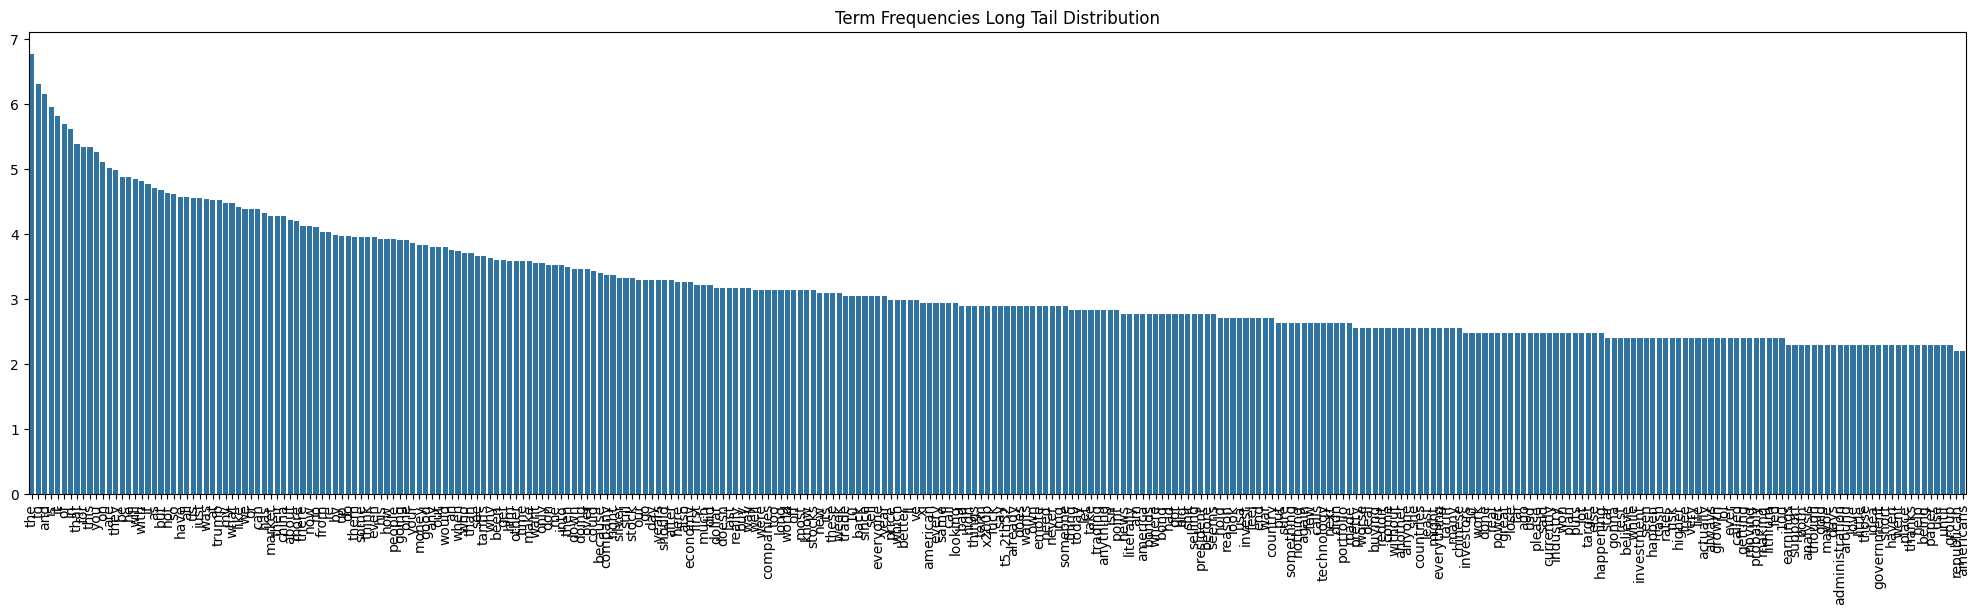

In [24]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
# convert term_frequencies_log to np array
term_frequencies_log = np.array(term_frequencies_log)
sorted_idx = np.argsort(term_frequencies_log)[::-1]
kept_terms = count_vect.get_feature_names_out()[sorted_idx]
kept_freqs = term_frequencies_log[sorted_idx]

plt.subplots(figsize=(25, 6))
g = sns.barplot(x=kept_terms[:300], y=kept_freqs[:300])
g.set_xticklabels(kept_terms[:300], rotation=90)
plt.title("Term Frequencies Long Tail Distribution")
plt.show()
# the decrease trend is slower than exercise 14

# part 3 data visualizations

In [25]:
df

,title,text,sentiment,label,subjectivity,unigrams
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,-1.0,1.000000,"[Calls, on, retards]"
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,0.0,0.177778,"[Stunt, as, in, like, why, did, they, even, ma..."
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,0.0,0.000000,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,-1.0,0.000000,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...,...,...
841,The Trump administration is begging Xi Jinping...,So countries “begging to stop the tariffs” and...,0.0,1.0,0.000000,"[So, countries, “, begging, to, stop, the, tar..."
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,1.0,0.000000,"[Invest, now, it, is, going, to, shoot, up, to..."
843,$ U.S. dollar value (crashing),Where can I read this?,0.0,0.0,0.000000,"[Where, can, I, read, this, ?]"
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,0.000000,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


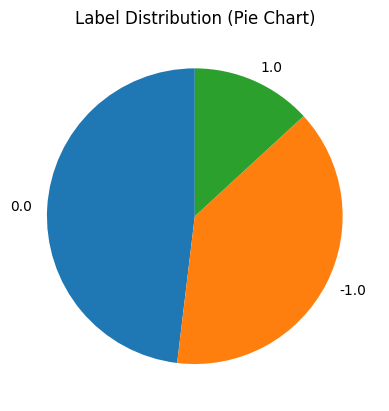

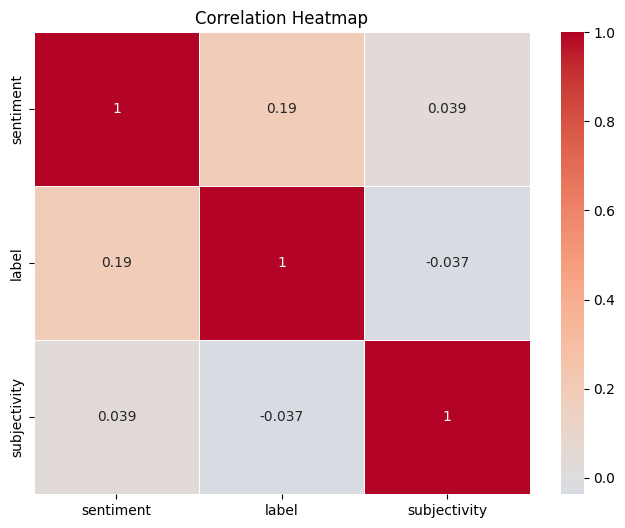

In [26]:
# Answer here
label_counts = df['label'].value_counts()
plt.pie(label_counts,
        labels=label_counts.index,
        startangle=90)
plt.title("Label Distribution (Pie Chart)")
plt.show()

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()



# Phase 2

We choose the label for classification.
The goal is to use the text to predict the label — we will use *label* as the category, with *negative*, *neutral*, and *positive* as the category names.
Therefore, we drop other columns such as *subjectivity* and *title*.
The new dataset without these columns will be used for pattern mining.

In [27]:
df.drop(columns=["title","subjectivity"],inplace=True)
df

,text,sentiment,label,unigrams
0,Calls on retards,-1.0,-1.0,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...
841,So countries “begging to stop the tariffs” and...,0.0,1.0,"[So, countries, “, begging, to, stop, the, tar..."
842,Invest now it is going to shoot up tomorrow,0.0,1.0,"[Invest, now, it, is, going, to, shoot, up, to..."
843,Where can I read this?,0.0,0.0,"[Where, can, I, read, this, ?]"
845,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


In [28]:
category_map = {"-1.0":"negative","0.0":"netural","1.0":"positive"}
df["category_name"] = df["label"].apply(lambda x:category_map[str(x)])
df

,text,sentiment,label,unigrams,category_name
0,Calls on retards,-1.0,-1.0,"[Calls, on, retards]",negative
1,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma...",netural
2,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]",netural
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...",positive
4,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]",negative
...,...,...,...,...,...
841,So countries “begging to stop the tariffs” and...,0.0,1.0,"[So, countries, “, begging, to, stop, the, tar...",positive
842,Invest now it is going to shoot up tomorrow,0.0,1.0,"[Invest, now, it, is, going, to, shoot, up, to...",positive
843,Where can I read this?,0.0,0.0,"[Where, can, I, read, this, ?]",netural
845,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,"[i, sold, my, puts, so, i, expect, cheeto, to,...",negative


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['label'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [30]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=2 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category 1.0:


,06,10,100,116,12,153,1728,18,1981,1992,...,year,years,yelling,yes,yesterday,yields,yikes,you,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


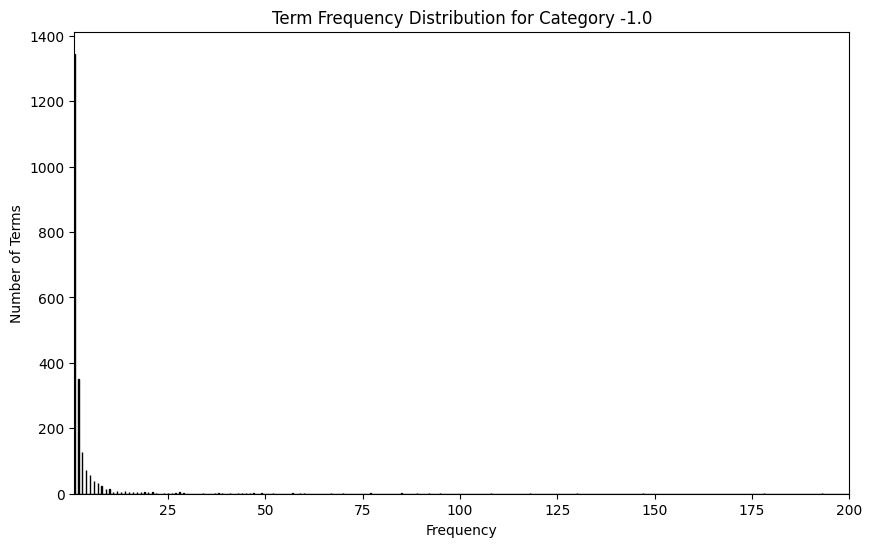

In [31]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [32]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: -1.0
Number of terms in top 5%: 109
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'this', 'he', 'will', 'for', 'you', 'be', 'are', 'trump', 'they', 'us', 'on', 'as', 'so', 'not', 'all', 'have', 'china', 'but', 'has', 'just', 'we', 'what', 'if', 'with', 'was', 'at', 'his', 'can', 'their', 'even', 'about', 'or', 'like', 'no', 'there', 'people', 'my', 'market', 'more', 'him', 'them', 'think', 'now', 'going', 'money', 'one', 're', 'make', 'how', 'would', 'do', 'an', 'down', 'out', 'than', 'economy', 'from', 'tariffs', 'up', 'other', 'by', 'then', 'when', 'get', 'over', 'who', 'some', 'doing', 'doesn', 'been', 'trade', 'fuck', 'don', 'see', 'why', 'still', 'only', 'time', 'any', 'because', 'really', 'good', 'world', 'our', 'wants', 'xi', 'american', 'point', 'go', 'back', 'your', 'never', 'much', 'could', 'most', 'everyone', 'shit', 'me', 'literally', 'after', 'these']


In [33]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: -1.0
Number of terms in bottom 1%: 21
Filtered terms: ['200', '200k', '2011', '2021', '2025', 'ya', 'yea', 'yields', '1934', '1947', '1953', '1961', '1969', '1973', '1974', '1999', 'woefully', 'woke', '150', '16', '160']


# Exercise 16

In [91]:
category_number=0 #You can change it from 0 to 3
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category -1.0 we filter the following words:
Bottom 1.0% words: 
words          0.044658
1999           0.044658
1974           0.044658
vice           0.044658
1973           0.044658
taxpayer       0.044658
across         0.044658
coup           0.044658
lives          0.044658
fleecing       0.044658
figure         0.044658
spiro          0.044658
occupied       0.044658
oligarchs      0.044658
positions      0.044658
pound          0.044658
space          0.044658
gaslighting    0.044658
future         0.044658
intent         0.044658
gerald         0.044658
dtype: float64
Top 5.0% words: 
feel       1.914246
these      1.934540
dump       1.959543
silver     1.961282
some       1.981093
            ...    
it        11.435490
and       12.824546
is        13.781198
to        14.945594
the       21.994810
Length: 109, dtype: float64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
writing            0.036964
savings            0.036964
forget             0.

,000,02,03,10,100,1000,10000,11,12,13,...,year,years,yet,yields,yippee,yo,your,yourselves,youtube,zero
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.0,0.152483,0.152483,0.0,0.0,0.0,0.0,0.0,0.0,0.142285,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.254683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
313,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### The situation is basically similar to the exercise.
### The top 5% of words in most categories are stopwords that do not provide any meaningful information about the content, such as "the," "in," and "of."

### The remaining words in the top 5% are usually common verbs used in daily life or nouns that frequently appear in stock-related Reddit posts.

### As for the bottom 1% of words, they are typically numbers or terms that are not related to the main content of most posts.


# Exercise 17

In [35]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category_map[str(category)]
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.815873015873017
Maximum Transaction Size : 132
Standard Deviation Transaction Size : 13.153950536399085
Variance in Transaction Sizes : 173.5774542513396
Sparsity : 0.994269702708112


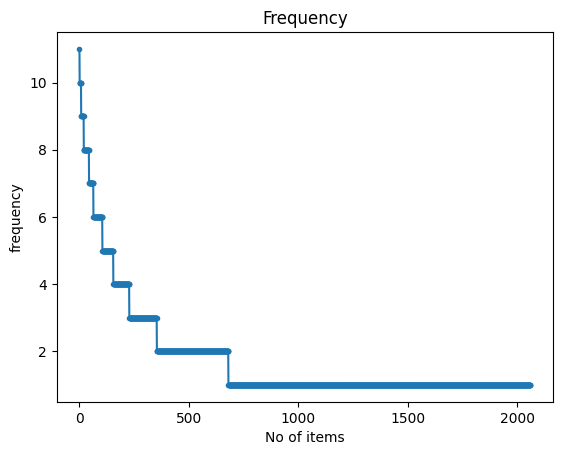

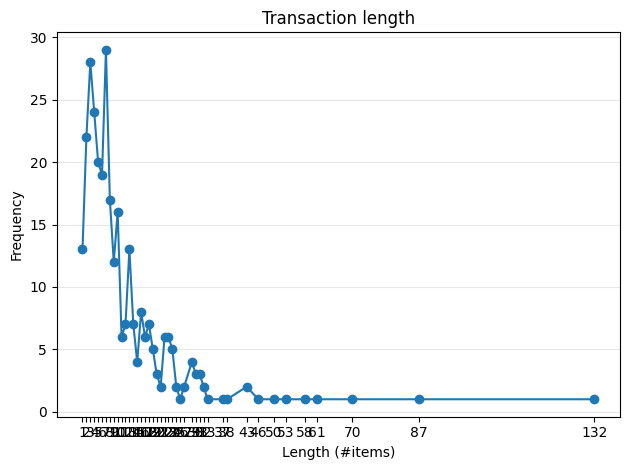

In [36]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 382
Number of items : 2543
Minimum Transaction Size : 1
Average Transaction Size : 10.934554973821989
Maximum Transaction Size : 198
Standard Deviation Transaction Size : 18.729918661708144
Variance in Transaction Sizes : 351.7306138434266
Sparsity : 0.9957001356768297


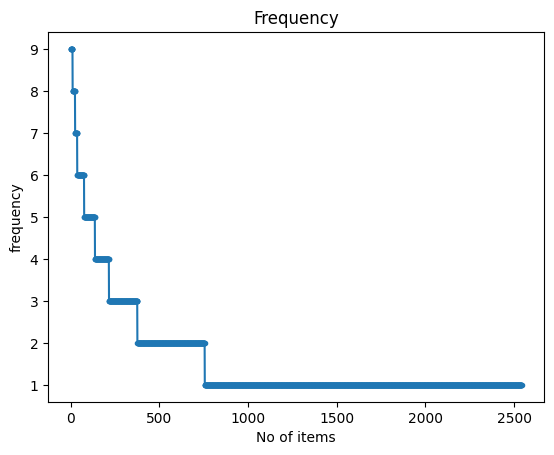

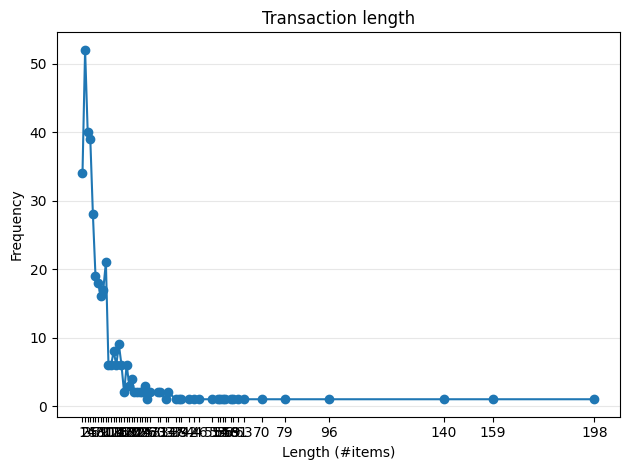

In [37]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_netural.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 106
Number of items : 1099
Minimum Transaction Size : 1
Average Transaction Size : 14.462264150943396
Maximum Transaction Size : 91
Standard Deviation Transaction Size : 16.904936494778337
Variance in Transaction Sizes : 288.49856244384546
Sparsity : 0.9868405239754837


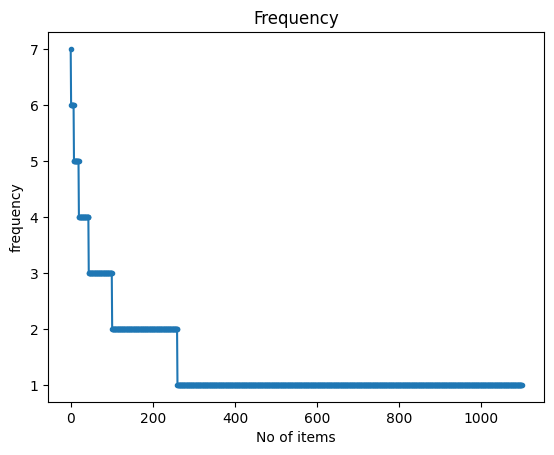

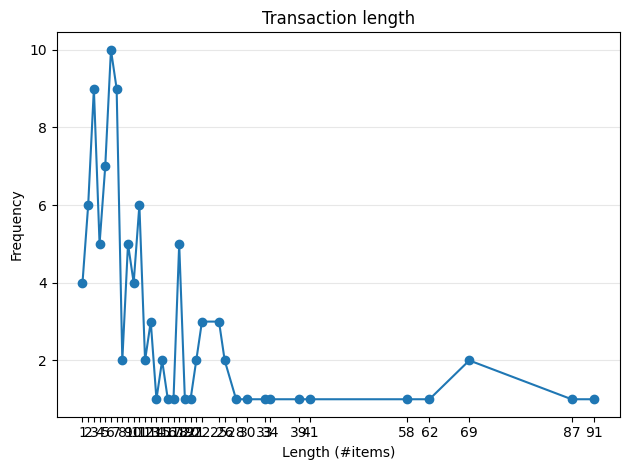

In [38]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### We choose a minimum support (minSup) of 3 for two reasons:
### **Item Frequency:** The first graph shows that most items do not appear very often in the transactions.
### **Transaction Length:** The second graph shows that most transactions involve only a small number of items.

In [39]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_negative= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
frequentPatternsDF_negative

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 399
Runtime: 0.0029861927032470703


,Patterns,Support
0,personally,3
1,starting,3
2,honestly,3
3,exactly,3
4,square,3
...,...,...
394,sure,10
395,should,10
396,bad,10
397,again,10


In [40]:
minSup=3
obj = alg.FPGrowth(iFile='td_freq_db_netural.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_netural= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_netural))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
frequentPatternsDF_netural

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 418
Runtime: 0.31551504135131836


,Patterns,Support
0,politics,3
1,seeing,3
2,trap,3
3,word,3
4,write,3
...,...,...
413,reddit,9
414,long,9
415,ll,9
416,am,9


In [41]:
minSup=3
obj = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_positive= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
frequentPatternsDF_positive

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 109
Runtime: 0.0007791519165039062


,Patterns,Support
0,come,3
1,electric,3
2,ll,3
3,main,3
4,making,3
...,...,...
104,them,6
105,out,6
106,economy,6
107,way,6


In [43]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative,frequentPatternsDF_netural,frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for d in dfs:
    for pattern in d['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for d in dfs:
    filtered_df = d[d['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
234       week        9
231        off        9
496       said        9
497     reddit        9
232       last        9
..         ...      ...
284    process        3
283  expensive        3
282       etfs        3
281  contracts        3
261         ai        3

[560 rows x 2 columns]
Number of patterns discarded: 366


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(df['text'])
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)


In [53]:
# Answer Here
from PAMI.frequentPattern.topk import FAE  as alg

kCounts=[500]
seperator='\t'

for kC in kCounts:
    obj5 = alg.FAE(iFile='td_freq_db_negative.csv', k=kC, sep=seperator)
    obj5.mine()
    frequentPatternsDF__negative= obj5.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF__negative))) #print the total number of patterns
    print('Runtime: ' + str(obj5.getRuntime())) #measure the runtime
    print(frequentPatternsDF__negative)

# obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
# frequentPatternsDF_soc_religion_christian

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.06198692321777344
    Patterns  Support
0    already       11
1     things       10
2       here       10
3        day       10
4       sure       10
..       ...      ...
495   ensure        2
496    exact        2
497  federal        2
498     ford        2
499  highest        2

[500 rows x 2 columns]


In [54]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm
minSups=[3, 6, 9]
seperator='\t'

for mS in minSups:
    obj6 = alg.MaxFPGrowth(iFile='td_freq_db_negative.csv', minSup=mS, sep=seperator)
    obj6.mine()
    frequentPatternsDF__negative= obj6.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF__negative))) #print the total number of patterns
    print('Runtime: ' + str(obj6.getRuntime())) #measure the runtime
    print(frequentPatternsDF__negative)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 334
Runtime: 0.004277706146240234
          Patterns  Support
0           being         3
1          leader         3
2        remember         3
3            fair         3
4          beyond         3
..             ...      ...
329           bad        10
330        should        10
331          sure        10
332           day        10
333  already here         3

[334 rows x 2 columns]
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 105
Runtime: 0.0017549991607666016
     Patterns  Support
0      gonna         6
1    trading         6
2       lost         6
3     silver         6
4     though         6
..        ...      ...
100     sure        10
101      day        10
102     here        10
103   things        10
104  already        11

[105 rows x 2 columns]
Maximal Frequent patterns were generated successfully using

In [ ]:
# Differences
# The running time of FAE Top-K increases as k increases.
# When k exceeds 500, the runtime is more than 10 minutes, so the results were not recorded.
# The running time of MaxFPGrowth decreases as minSup increases.
# Number of patterns: FAE Top-K > FPGrowth > MaxFPGrowth.
# Similarities
# High-frequency pattern consistency: most algorithms identify the same high-frequency patterns (such as "already").
# The results basically match those in the exercise from the master notebook.

# Exercise 18

In [57]:
X = df

In [58]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

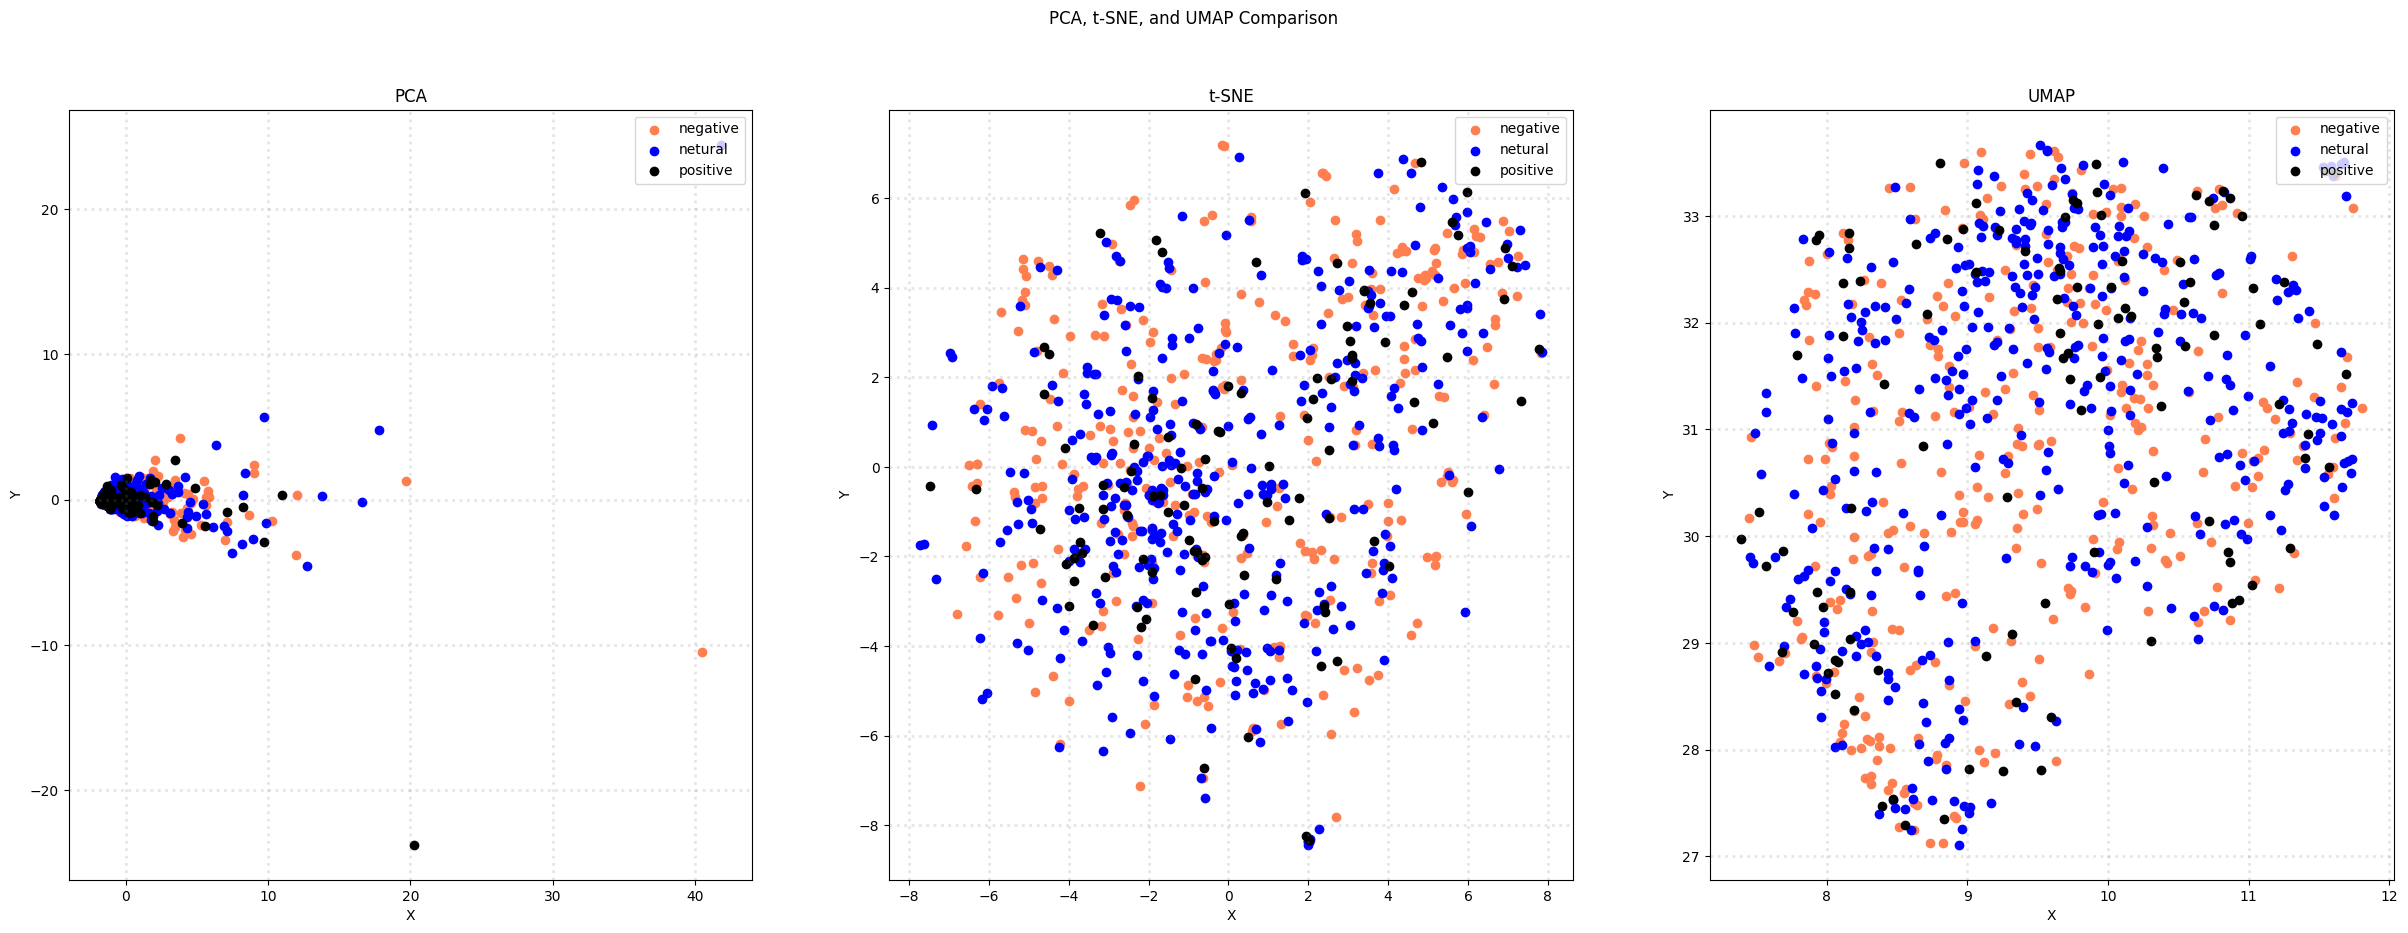

In [59]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [60]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

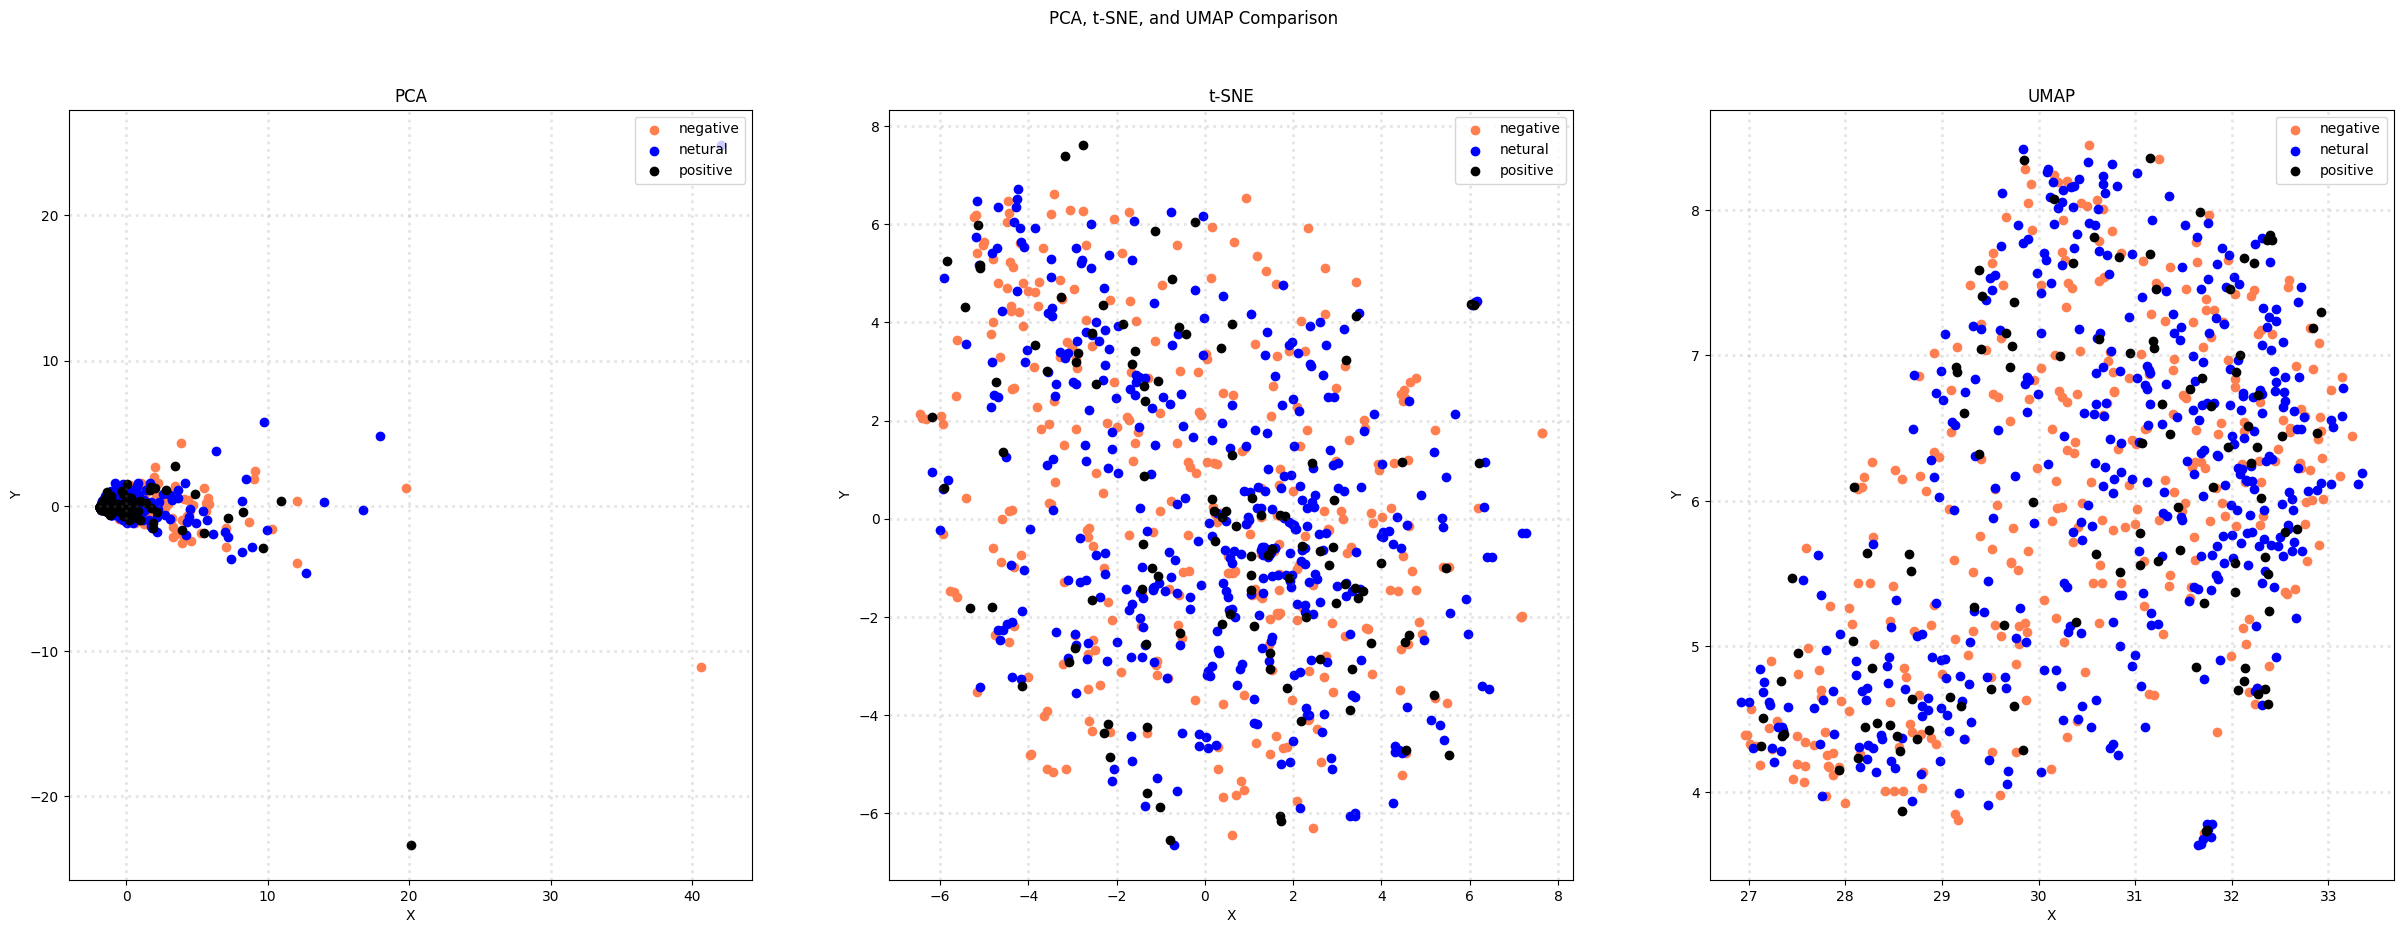

In [61]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

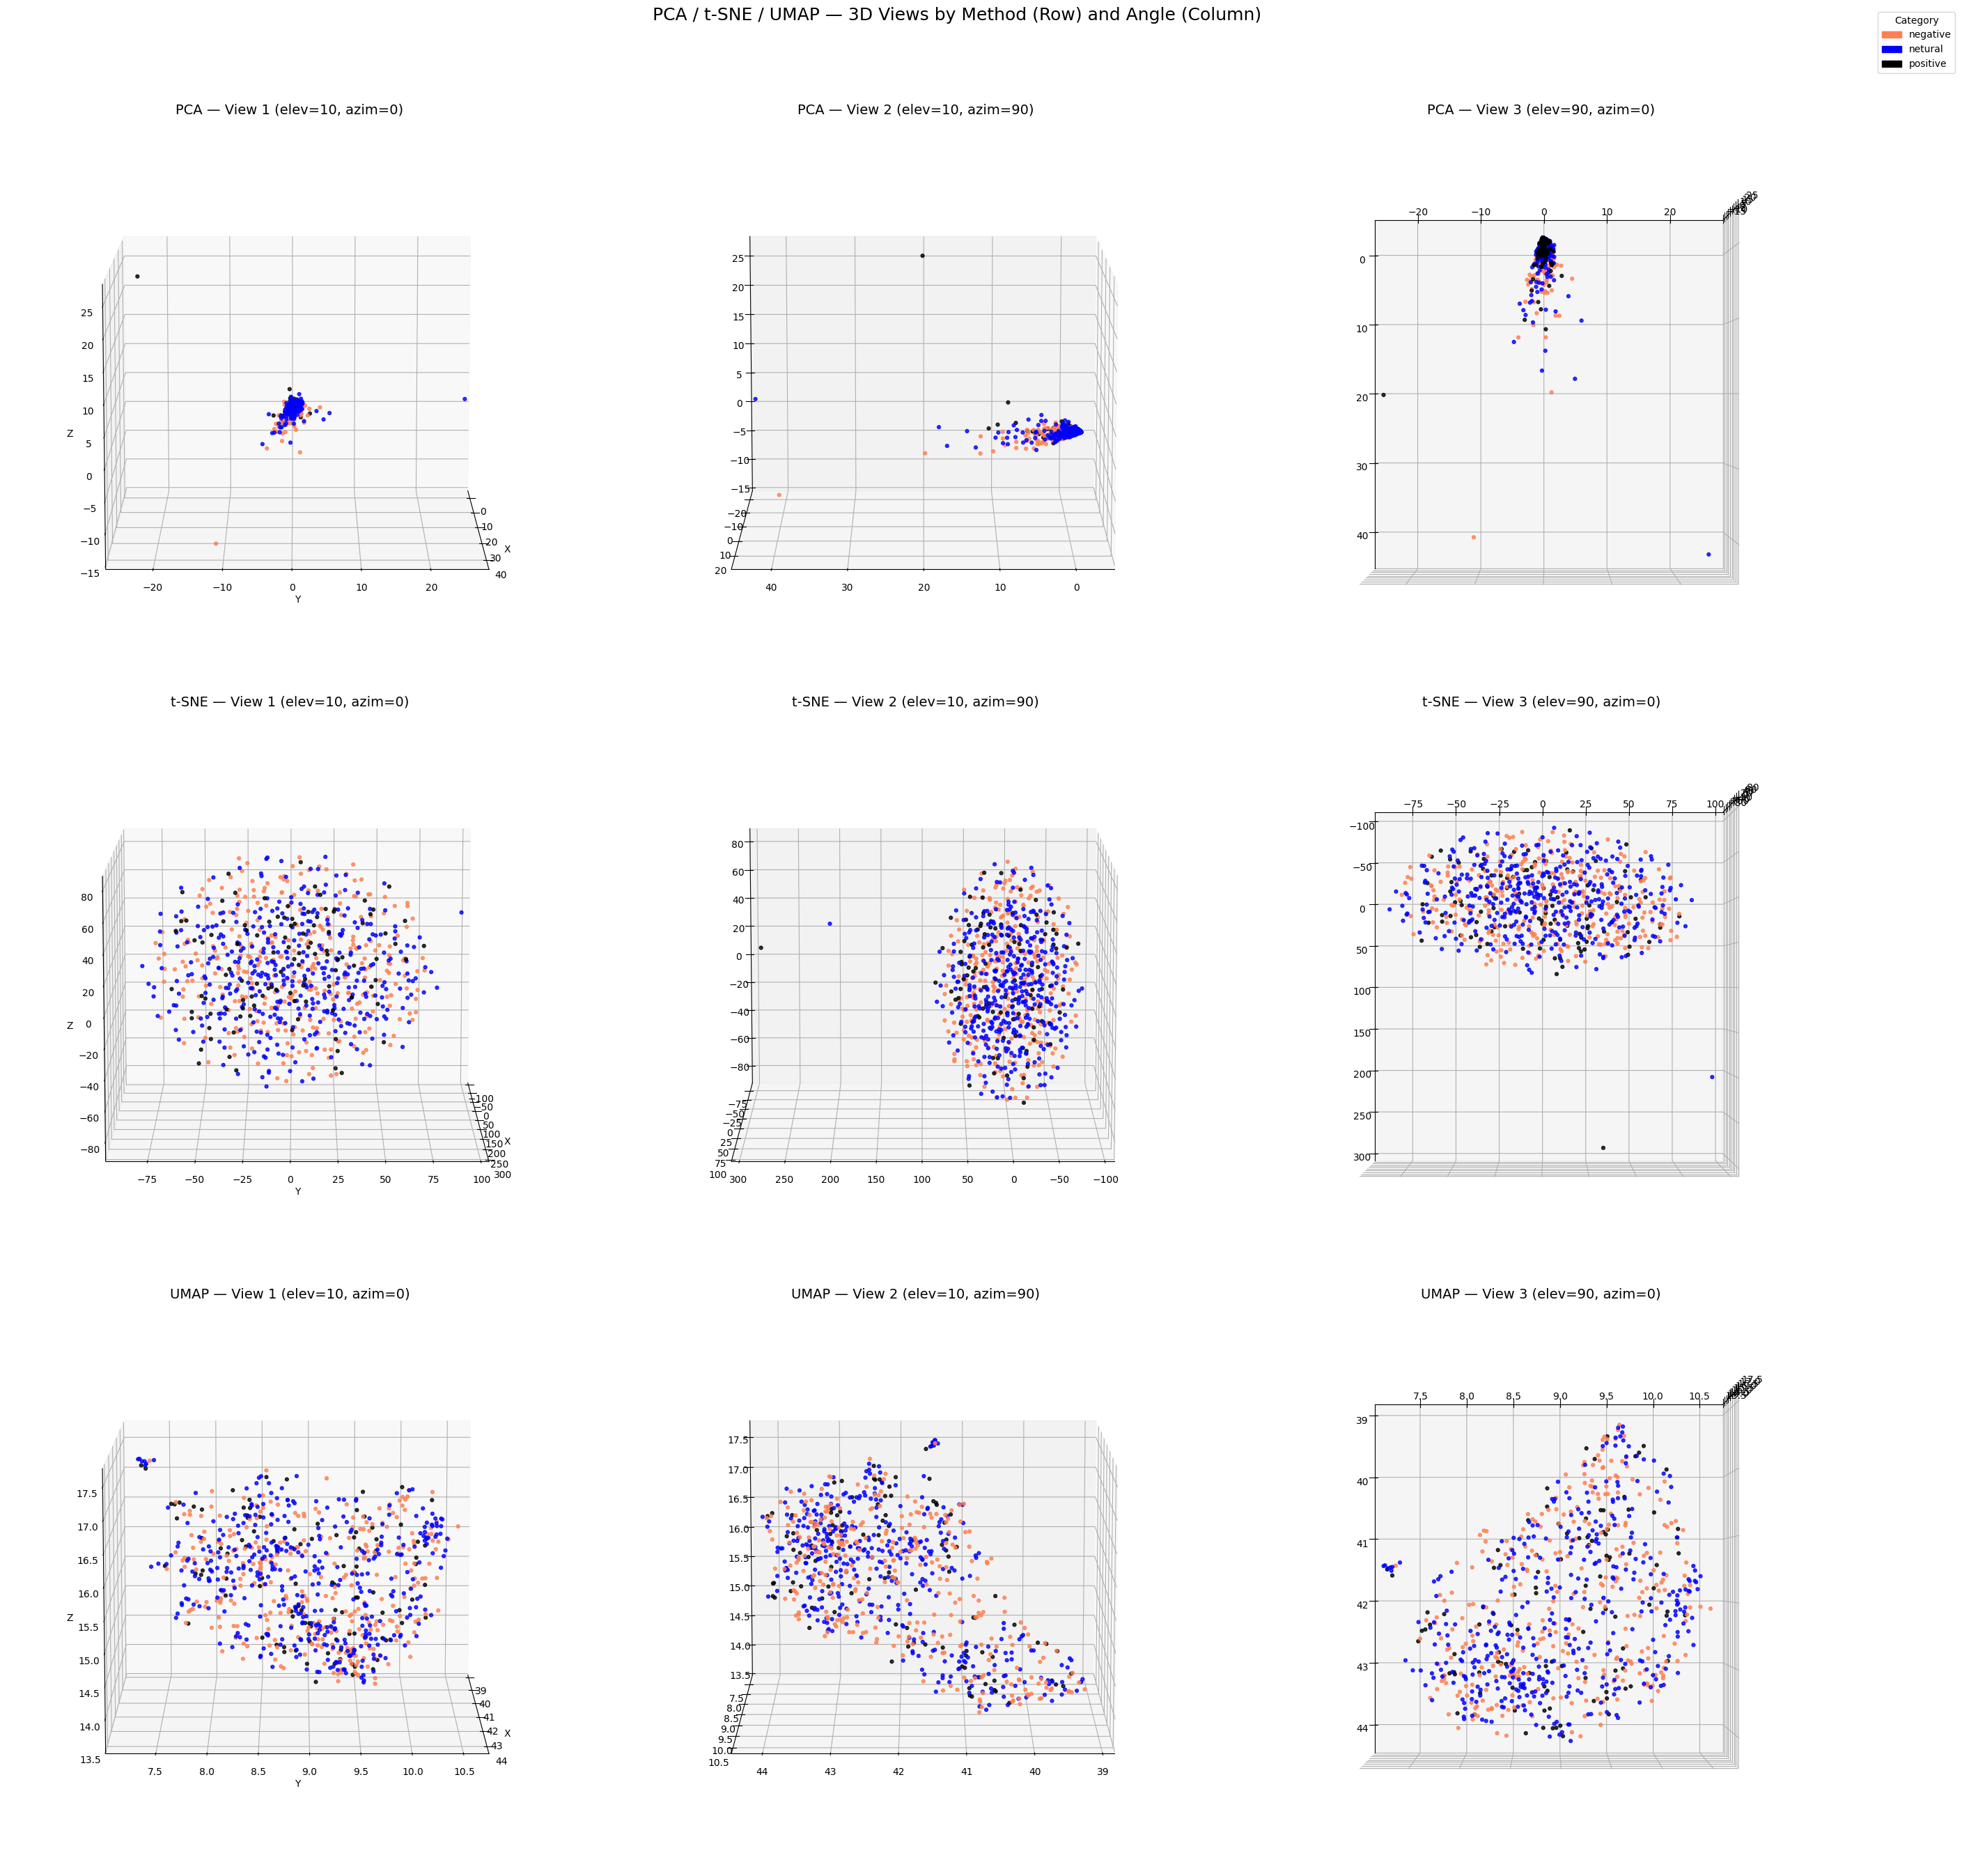

In [62]:
#Answer Here
X_pca_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

methods = [
    ('PCA',  X_pca_3),
    ('t-SNE', X_tsne_3),
    ('UMAP', X_umap_3),
]

angles = [
    (10, 0),    # Front view
    (10, 90),   # Right view
    (90, 0),    # Top view
]
fig, axes = plt.subplots(
    nrows=3, ncols=3,
    subplot_kw={'projection': '3d'},
    figsize=(30, 28)
)
fig.suptitle('PCA / t-SNE / UMAP — 3D Views by Method (Row) and Angle (Column)', fontsize=18)

def plot_scatter_3d(ax, X_reduced, angle, show_axes_labels=False, title=None):
    
    Xr = np.asarray(X_reduced)
    if Xr.shape[1] < 3:
        raise ValueError("Reduced data must have at least 3 components for 3D plotting.")

    for c, category in zip(col, categories):
        mask = (X['category_name'].values == category)
        xs = Xr[mask, 0]
        ys = Xr[mask, 1]
        zs = Xr[mask, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', alpha=0.8, s=12)

    elev, azim = angle
    ax.view_init(elev=elev, azim=azim)

    if title:
        ax.set_title(title, fontsize=14)
    if show_axes_labels:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_zlabel('')

    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.3)

for i, (name, X_red) in enumerate(methods):
    for j, angle in enumerate(angles):
        title = f'{name} — View {j+1} (elev={angle[0]}, azim={angle[1]})'
        show_axes_labels = (j == 0)
        plot_scatter_3d(axes[i, j], X_red, angle, show_axes_labels=show_axes_labels, title=title)

handles = [mpatches.Patch(color=c, label=str(cat)) for c, cat in zip(col, categories)]
fig.legend(handles=handles, title='Category', loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.tight_layout(rect=[0.02, 0.02, 0.94, 0.95])
plt.show()

In [63]:
# In all the graphs above, the points overlap and show no clear group boundaries.

# Exercise 19

In [65]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.label)
X['bin_category'] = mlb.transform(X['label']).tolist()
X[0:9]

,text,sentiment,label,unigrams,category_name,tokenized_text,bin_category
0,Calls on retards,-1.0,-1.0,"[Calls, on, retards]",negative,"{on, Calls, retards}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma...",netural,"{ever., first, about, the, place?, in, No, big...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]",netural,"{Seeing, the, red, in, of, ticker., lots}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...",positive,"{collaboration, This, 116, world, ripple, it's...","[0, 0, 1]"
4,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]",negative,"{didn’t, say, you., thank, He}","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...",netural,"{Hoping, wish, in, tonight,, me, to, ejaculate...","[0, 1, 0]"
6,Trump will respond to china increasing their t...,-1.0,-1.0,"[Trump, will, respond, to, china, increasing, ...",negative,"{the, LOT, Powell., fired,, china, and, person...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1.0,0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...",netural,"{let, slowly, spread, trap., this, been, month...","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...",positive,"{held, seeing, new, the, week, Green, Am, The,...","[0, 0, 1]"


In [67]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,sentiment,label,unigrams,category_name,tokenized_text,bin_category,bin_category_name
0,Calls on retards,-1.0,-1.0,"[Calls, on, retards]",negative,"{on, Calls, retards}","[1, 0, 0]","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma...",netural,"{ever., first, about, the, place?, in, No, big...","[0, 1, 0]","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]",netural,"{Seeing, the, red, in, of, ticker., lots}","[0, 1, 0]","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...",positive,"{collaboration, This, 116, world, ripple, it's...","[0, 0, 1]","[0, 0, 1]"
4,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]",negative,"{didn’t, say, you., thank, He}","[1, 0, 0]","[1, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...",netural,"{Hoping, wish, in, tonight,, me, to, ejaculate...","[0, 1, 0]","[0, 1, 0]"
6,Trump will respond to china increasing their t...,-1.0,-1.0,"[Trump, will, respond, to, china, increasing, ...",negative,"{the, LOT, Powell., fired,, china, and, person...","[1, 0, 0]","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1.0,0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...",netural,"{let, slowly, spread, trap., this, been, month...","[0, 1, 0]","[0, 1, 0]"
8,Am I the only one seeing the cup & handle brea...,1.0,1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...",positive,"{held, seeing, new, the, week, Green, Am, The,...","[0, 0, 1]","[0, 0, 1]"


# Exercise 20

In [69]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[50]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [70]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.144338
Cosine Similarity using count bw 2 and 3: 0.104257
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_228648/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_228648/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_228648/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_228648/452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfo

# Exercise 21

In [72]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

In [73]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5532786885245902

Classification Report:
               precision    recall  f1-score   support

    negative     0.5192    0.8351    0.6403        97
     netural     0.6667    0.4463    0.5347       121
    positive     0.0000    0.0000    0.0000        26

    accuracy                         0.5533       244
   macro avg     0.3953    0.4271    0.3917       244
weighted avg     0.5370    0.5533    0.5197       244



In [74]:
#Answer
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['label', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5450819672131147

Classification Report:
               precision    recall  f1-score   support

    negative     0.5200    0.8041    0.6316        97
     netural     0.6471    0.4545    0.5340       121
    positive     0.0000    0.0000    0.0000        26

    accuracy                         0.5451       244
   macro avg     0.3890    0.4196    0.3885       244
weighted avg     0.5276    0.5451    0.5159       244



# Exercise 22

With the augmented data, the accuracy does not increase, suggesting that the pattern features do not help distinguish the differences between labels.

# Exercise 23

In [82]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_train)
print("Decision Tree train Accuracy (TDM):", accuracy_score(y_train, y_pred_dt))
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree train Accuracy (TDM): 1.0
Decision Tree Accuracy (TDM): 0.48360655737704916

Classification Report:
               precision    recall  f1-score   support

    negative     0.4713    0.4227    0.4457        97
     netural     0.5489    0.6033    0.5748       121
    positive     0.1667    0.1538    0.1600        26

    accuracy                         0.4836       244
   macro avg     0.3956    0.3933    0.3935       244
weighted avg     0.4773    0.4836    0.4793       244



In [83]:
#Answer
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_train)

# Evaluate the classifier
print("Naive Bayes Accuracy train:", accuracy_score(y_train, y_pred))
# Predict and evaluate

# print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Naive Bayes Accuracy train: 0.8664323374340949


#### By printing the training accuracy, we can clearly see that the Decision Tree overfits, as the training accuracy is 1 and the model memorizes all the answers.

#### In this case, the testing accuracy will be lower than that of Naive Bayes, which generalizes better.

#### Decision Trees are prone to overfitting because they can create very complex, deeply branched models that capture noise and outliers in the training data.

# Exercise 24

In [85]:
#Answer
# Decision Tree with only the document-term frequency data

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_train)
print("Decision Tree train Accuracy (TDM):", accuracy_score(y_train, y_pred_dt))

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))
# It is not better than Naive Bayes because it overfits again — the training accuracy is 1, indicating this.

Decision Tree train Accuracy (TDM): 1.0
Decision Tree Accuracy (TDM): 0.5040983606557377

Classification Report:
               precision    recall  f1-score   support

    negative     0.4886    0.4433    0.4649        97
     netural     0.5573    0.6033    0.5794       121
    positive     0.2800    0.2692    0.2745        26

    accuracy                         0.5041       244
   macro avg     0.4420    0.4386    0.4396       244
weighted avg     0.5004    0.5041    0.5014       244



# Exercise 25(skip)

# part three

In [86]:
X

,text,sentiment,label,unigrams,category_name,tokenized_text,bin_category,bin_category_name
0,Calls on retards,-1.0,-1.0,"[Calls, on, retards]",negative,"{on, Calls, retards}","[1, 0, 0]","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma...",netural,"{ever., first, about, the, place?, in, No, big...","[0, 1, 0]","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]",netural,"{Seeing, the, red, in, of, ticker., lots}","[0, 1, 0]","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri...",positive,"{collaboration, This, 116, world, ripple, it's...","[0, 0, 1]","[0, 0, 1]"
4,He didn’t say thank you.,0.0,-1.0,"[He, didn, ’, t, say, thank, you, .]",negative,"{didn’t, say, you., thank, He}","[1, 0, 0]","[1, 0, 0]"
...,...,...,...,...,...,...,...,...
841,So countries “begging to stop the tariffs” and...,0.0,1.0,"[So, countries, “, begging, to, stop, the, tar...",positive,"{tariffs”, So, anything, the, just, countries,...","[0, 0, 1]","[0, 0, 1]"
842,Invest now it is going to shoot up tomorrow,0.0,1.0,"[Invest, now, it, is, going, to, shoot, up, to...",positive,"{up, Invest, it, now, to, shoot, tomorrow, is,...","[0, 0, 1]","[0, 0, 1]"
843,Where can I read this?,0.0,0.0,"[Where, can, I, read, this, ?]",netural,"{read, this?, can, Where, I}","[0, 1, 0]","[0, 1, 0]"
845,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,"[i, sold, my, puts, so, i, expect, cheeto, to,...",negative,"{puts, so, declare, i, denmark, my, war, sold,...","[1, 0, 0]","[1, 0, 0]"


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X['text'])
terms = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=terms, index=df.index)

X_train, X_test, y_train, y_test = train_test_split(
    df_tfidf, X['label'], test_size=0.2, random_state=42
)
nb_tfidf = GaussianNB()
nb_tfidf.fit(X_train, y_train)
# Predict and evaluate
y_pred = nb_tfidf.predict(X_train)
print("tfidf model train Accuracy (TDM):", accuracy_score(y_train, y_pred))
y_pred = nb_tfidf.predict(X_test)
print("tfidf model test Accuracy (TDM):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

tfidf model train Accuracy (TDM): 0.9461538461538461
tfidf model test Accuracy (TDM): 0.4662576687116564

Classification Report:
               precision    recall  f1-score   support

    negative     0.5125    0.6508    0.5734        63
     netural     0.5536    0.3875    0.4559        80
    positive     0.1481    0.2000    0.1702        20

    accuracy                         0.4663       163
   macro avg     0.4047    0.4128    0.3998       163
weighted avg     0.4880    0.4663    0.4663       163



In [100]:
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = nb_classifier.predict(X_train)
print("word frequency model train Accuracy (TDM):", accuracy_score(y_train, y_pred))
y_pred = nb_classifier.predict(X_test)
print("word frequency model test Accuracy (TDM):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

word frequency model train Accuracy (TDM): 0.8664323374340949
word frequency model test Accuracy (TDM): 0.5532786885245902

Classification Report:
               precision    recall  f1-score   support

    negative     0.5192    0.8351    0.6403        97
     netural     0.6667    0.4463    0.5347       121
    positive     0.0000    0.0000    0.0000        26

    accuracy                         0.5533       244
   macro avg     0.3953    0.4271    0.3917       244
weighted avg     0.5370    0.5533    0.5197       244



### According to the article, Multinomial Naive Bayes assumes that features represent how many times a word appears, so it works best with term frequency (word counts).

### Gaussian Naive Bayes, on the other hand, assumes that features are continuous values, so it fits better with TF-IDF, which produces floating-point weights that can be treated as continuous.

### As for the results, the experiment above shows that term frequency features with the Multinomial Naive Bayes model perform better overall but fail to clearly distinguish positive samples from other categories. However, although the overall accuracy is lower, the TF-IDF combined with the Gaussian Naive Bayes model generalizes better across labels, as it learns to distinguish positive samples from other categories more effectively than the former.

# part four

For the above model, we did not evaluate whether it generalizes well, nor did we set limits on the hyperparameters, making some comparisons not very meaningful.
In the data exploration and analysis stage, we also did not make further adjustments to the data based on the results.
The evaluation metric is limited to accuracy only, which is sometimes not ideal for classification tasks.
Moreover, the code did not perform a complete and validated feature selection process, even though it is very important in real-world data preprocessing.
For the above problem, we can apply the following adjustments to improve:
Apply cross-validation and utilize bounded hyperparameter tuning to ensure reliable comparisons.
Clean or transform the data based on insights from data exploration, for instance, handling outliers.
Add additional metrics such as precision, recall, F1-score, and PR-AUC for better evaluation of model performance.
Perform feature selection using correlation analysis, mutual information, or model-based importance to remove redundant and irrelevant features.